## Make your classifier more intelligible
When we train a CNN classifier on set of classes, it will predict one of the class when a new image belong to the given domain classes is presented. However, sometimes when an image, not belonged to the given domain, is given, classifier still predicts from the same predefined classes making model as moron. 


If an image from the new domain is presented, model should predict or return "nothing" signifying model doesnt recognise that class. This makes model more intelligible and sensible to the questions. Lets see how it is implemented in fastai.

In [1]:
from fastai.vision.all import *

### Lets take PETs Dataset

This dataset comprises only dogs and cats. Every image is either dog or cat with their names shown above the image in ```show_batch``` below

In [2]:
path=untar_data(URLs.PETS)
path.ls()

(#2) [Path('/home/studio-lab-user/.fastai/data/oxford-iiit-pet/images'),Path('/home/studio-lab-user/.fastai/data/oxford-iiit-pet/annotations')]

In [3]:
data=DataBlock(blocks=(ImageBlock,MultiCategoryBlock),
              get_items=get_image_files,
              get_y=Pipeline([RegexLabeller(pat = r'/([^/]+)_\d+.jpg$'), lambda x:[x]]),
              item_tfms=Resize(460),
              batch_tfms=[*aug_transforms(size=224, max_warp=0.),Normalize.from_stats(*imagenet_stats)])
data

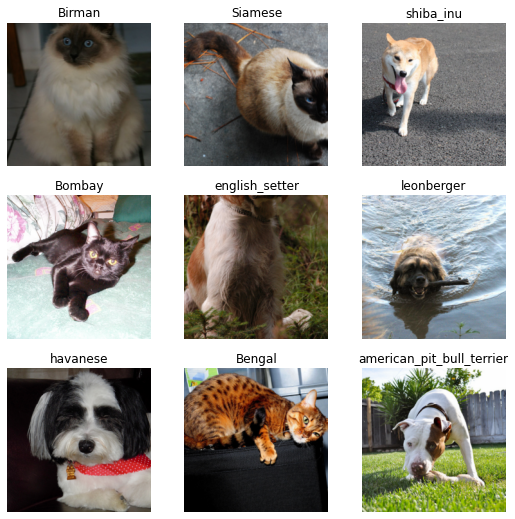

In [4]:
data.dataloaders(path/'images').show_batch()

now learner is created with accuracy multi as metric 

In [5]:
dls=data.dataloaders(path/'images')

### Classifying with default threshold of 0.5

If threshold for ```accuracy_multi``` is 0.5 then the model will get trained to predict every image as one of the given classes.

In [6]:
learn=cnn_learner(dls,resnet34,metrics=accuracy_multi).to_fp16()

/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /tmp/pip-req-build-yp9kxp8j/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


In [7]:
learn.fine_tune(4,base_lr=0.01)

epoch,train_loss,valid_loss,accuracy_multi,time
0,0.315477,0.026665,0.990784,00:34


epoch,train_loss,valid_loss,accuracy_multi,time
0,0.032152,0.041763,0.986395,00:34
1,0.028655,0.022055,0.992192,00:34
2,0.016309,0.011190,0.995886,00:34
3,0.007906,0.009991,0.996800,00:34


Now the following **lion** image will be predicted as one of the 37 breeds of dog or cat because we gave probability threshold as 0.5, so anything resembling will be treated as one of them.

<AxesSubplot:>

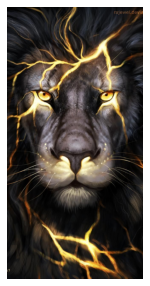

In [22]:
img=PILImage.create('/home/studio-lab-user/Learn_ML/images/3814759.jpg')
img.show()

In [23]:
learn.predict(img)[0]

(#1) ['english_setter']

### Classifying with threshold value of 0.95

Now model is trained to predict any one of the class only when it is confident above 95%. Otherwise it will give no prediction. Thats in a way makes sense for real world applications.

In [26]:
learn=cnn_learner(dls,resnet34,metrics=[partial(accuracy_multi,thresh=0.95)]).to_fp16()

In [27]:
learn.fine_tune(4,base_lr=0.01)

epoch,train_loss,valid_loss,accuracy_multi,time
0,0.312122,0.026755,0.981604,00:34


epoch,train_loss,valid_loss,accuracy_multi,time
0,0.033433,0.041984,0.983762,00:34
1,0.028736,0.023807,0.988480,00:34
2,0.016075,0.011050,0.992704,00:34
3,0.008382,0.009855,0.993435,00:34


Now model predicts nothing as it needs confidence level greater than 95%. 

In [30]:
learn.predict(img)[0]

(#0) []

Making a model a little more intelligble than simply predicting, is both exhilarating and fun. I deeply thank Mr Zach Mueller for showing how to do this in his www.walkwithfastai.com blog.